# Re-estimation of Analysis

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/private/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'private/thesis/')
data =pd.read_csv('data_final.csv')

'/Users/NatStrom'

In [3]:
print(data.columns)
display(data.describe())

Index(['Unnamed: 0', 'iso', 'year_id',
       'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
       'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
       'daly_mean_All causes_Unsafe water source_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
       'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
       'daly_m

,Unnamed: 0,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
count,25738.00000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,...,2.573800e+04,2.573800e+04,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000,25738.000000
mean,12868.50000,2007.886083,3728.352786,4731.743958,6478.474240,3728.352786,4731.743958,6478.474240,2407.283860,4731.743958,...,5.803149e+05,5.213953e+07,115.598376,97.380682,3.483464,14938.570985,2641.164504,13617.502059,13617.502059,14938.570985
std,7430.06495,8.959056,2161.793177,2909.144485,3942.039622,2161.793177,2909.144485,3942.039622,1482.360876,2909.144485,...,1.606693e+06,3.560595e+07,150.407029,122.146443,2.033905,8979.185496,1463.789589,8324.170822,8324.170822,8979.185496
min,0.00000,1990.000000,560.000000,484.000000,862.000000,560.000000,484.000000,862.000000,284.000000,484.000000,...,0.000000e+00,3.920820e+05,0.000000,0.000000,0.000000,1908.000000,328.000000,1630.000000,1630.000000,1908.000000
25%,6434.25000,2000.000000,1985.000000,2433.000000,3346.000000,1985.000000,2433.000000,3346.000000,1218.000000,2433.000000,...,7.190000e+03,2.808763e+07,9.000000,9.000000,2.302585,7713.000000,1434.000000,6777.000000,6777.000000,7713.000000
50%,12868.50000,2010.000000,3428.000000,4056.000000,5576.000000,3428.000000,4056.000000,5576.000000,2128.000000,4056.000000,...,3.691700e+04,4.468043e+07,45.000000,43.000000,3.828641,13383.000000,2538.000000,12010.000000,12010.000000,13383.000000
75%,19302.75000,2016.000000,4818.000000,6019.000000,8388.000000,4818.000000,6019.000000,8388.000000,3137.000000,6019.000000,...,2.538000e+05,9.575575e+07,197.000000,176.000000,5.288267,19280.000000,3438.000000,17646.000000,17646.000000,19280.000000
max,25737.00000,2019.000000,17536.000000,24562.000000,32010.000000,17536.000000,24562.000000,32010.000000,11715.000000,24562.000000,...,2.332957e+07,1.256802e+08,909.000000,778.000000,6.813445,74108.000000,11640.000000,68287.000000,68287.000000,74108.000000


# Vizualisation

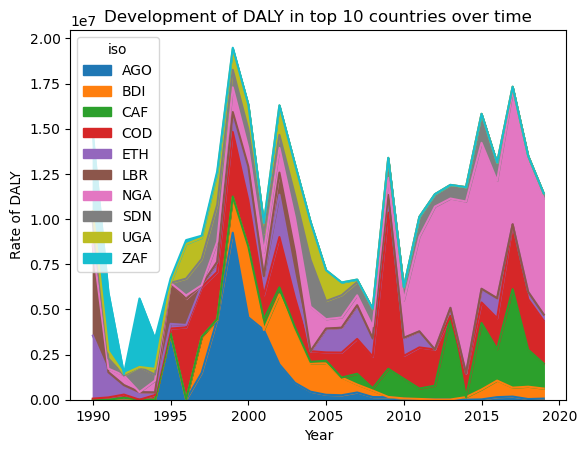

In [4]:
#time trend of the data
grouped = data.groupby(['iso', 'year_id']).agg({'daly_all': 'sum'})
top_donors = grouped.groupby('iso').agg({'daly_all': 'sum'}).nlargest(10, 'daly_all').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='daly_all')
pivoted.plot.area(stacked=True)

plt.title('Development of DALY in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Rate of DALY')
plt.savefig('timetrend_daly.png')
# Show the plot
plt.show()

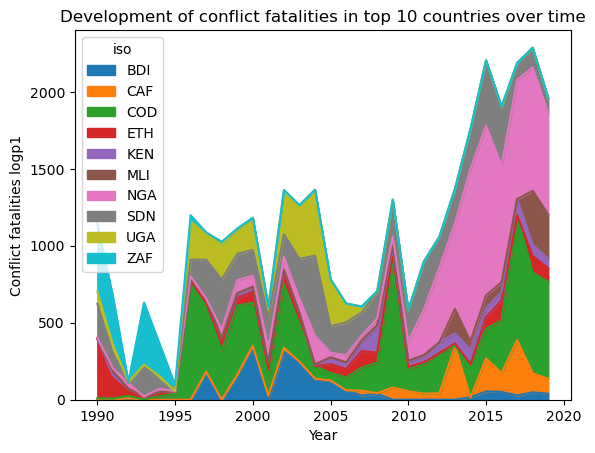

In [5]:
#time trend of the data
grouped = data.groupby(['iso', 'year_id']).agg({'best_log': 'sum'})
top_donors = grouped.groupby('iso').agg({'best_log': 'sum'}).nlargest(10, 'best_log').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='best_log')
pivoted.plot.area(stacked=True)

plt.title('Development of conflict fatalities in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Conflict fatalities logp1')
plt.savefig('timetrend_conflict.png')

# Show the plot
plt.show()

,year_id,best_log
0,1990,1517.192324
1,1991,748.394198
2,1992,187.737720
3,1993,680.584518
4,1994,402.560937
5,1995,354.652958
6,1996,1331.018293
7,1997,1290.662455
8,1998,1491.575907
9,1999,1578.251631


,year_id,daly_all
0,1990,16675926.0
1,1991,8894506.0
2,1992,2688681.0
3,1993,6472898.0
4,1994,4859987.0
5,1995,8254991.0
6,1996,11004788.0
7,1997,11301937.0
8,1998,16863246.0
9,1999,21607267.0


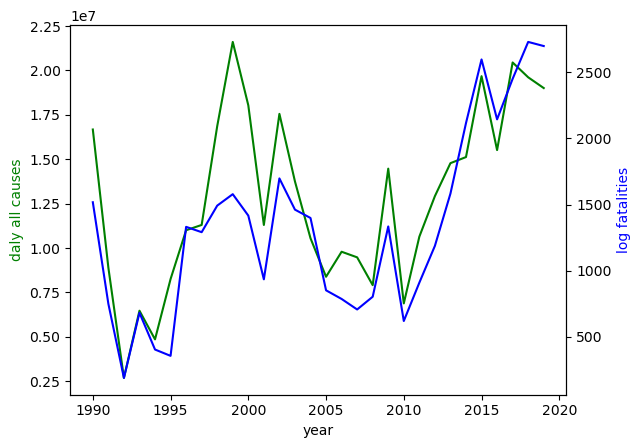

In [6]:
# combined plot
grouped_1 = data.groupby(['year_id']).agg({'best_log': 'sum'})
grouped_2 = data.groupby(['year_id']).agg({'daly_all': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
display(grouped_1)
display(grouped_2)
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(grouped_2.year_id,
        grouped_2.daly_all,
        color="green")
# set x-axis label
ax.set_xlabel("year", fontsize = 10)
# set y-axis label
ax.set_ylabel("daly all causes",
              color="green",
              fontsize=10)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_1.year_id, grouped_1["best_log"],color="blue")
ax2.set_ylabel("log fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_combined.png')
plt.show()

# start the reestimation by defining type of conflict

In [7]:
#define datasets with the different types of conflict
data_sb = data.loc[data['type_of_violence'] == 'sb']
display(data_sb)

data_ns = data.loc[data['type_of_violence'] == 'ns']
display(data_ns)

data_os = data.loc[data['type_of_violence'] == 'os']
display(data_os)

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23594,23594,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,...,726982.0,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0
23595,23595,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,...,726982.0,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0
23596,23596,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,...,726982.0,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0
23597,23597,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,...,726982.0,10522988,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0


,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
1067,1067,BDI,1997,5543.0,7311.0,9727.0,5543.0,7311.0,9727.0,3695.0,...,24350.0,1373342,0.0,0.0,0.000000,22581.0,3694.0,20733.0,20733.0,22581.0
1347,1347,BDI,2000,4986.0,6746.0,8978.0,4986.0,6746.0,8978.0,3414.0,...,731191.0,1373342,1.0,1.0,0.693147,20710.0,3144.0,19138.0,19138.0,20710.0
1684,1684,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,...,230.0,1373342,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0
1685,1685,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,...,230.0,1373342,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0
1686,1686,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,...,230.0,1373342,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25619,25619,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,...,15015174.0,42278727,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0
25620,25620,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,...,15015174.0,42278727,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0
25621,25621,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,...,15015174.0,42278727,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0
25634,25634,ZAF,2016,624.0,559.0,958.0,624.0,559.0,958.0,317.0,...,7520.0,42278727,131.0,121.0,4.882802,2141.0,612.0,1834.0,1834.0,2141.0


,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
65,65,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
66,66,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
67,67,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
68,68,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
69,69,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


# start with the base model including the DUMMY

In [8]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_all = mod.fit(cov_type='clustered', cluster_entity=True)
print(dummy_all)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):             -0.1802
No. Observations:               23932   R-squared (Within):               0.0019
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.1930
Time:                        14:53:19   Log-likelihood                -2.396e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      22.233
Entities:                          38   P-value                           0.0000
Avg Obs:                       629.79   Distribution:                 F(2,23892)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             1.8917
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [9]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb.txt', 'w') as f:
    f.write(dummy_sb.summary.as_text())
print(dummy_sb)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):             -0.1723
No. Observations:                9150   R-squared (Within):               0.0019
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.1823
Time:                        14:53:19   Log-likelihood                -9.169e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.7622
Entities:                          24   P-value                           0.0002
Avg Obs:                       381.25   Distribution:                  F(2,9124)
Min Obs:                       4.0000                                           
Max Obs:                       1690.0   F-statistic (robust):             0.6197
                            

In [10]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os.txt', 'w') as f:
    f.write(dummy_os.summary.as_text())
print(dummy_os)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0051
Estimator:                   PanelOLS   R-squared (Between):             -0.2286
No. Observations:                9095   R-squared (Within):               0.0051
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.2407
Time:                        14:53:19   Log-likelihood                -9.069e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      23.090
Entities:                          32   P-value                           0.0000
Avg Obs:                       284.22   Distribution:                  F(2,9061)
Min Obs:                       1.0000                                           
Max Obs:                       2452.0   F-statistic (robust):             16.413
                            

In [11]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummyns.txt', 'w') as f:
    f.write(dummy_ns.summary.as_text())
print(dummy_ns)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):             -0.0924
No. Observations:                5340   R-squared (Within):               0.0019
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.1219
Time:                        14:53:19   Log-likelihood                -5.279e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.0540
Entities:                          21   P-value                           0.0064
Avg Obs:                       254.29   Distribution:                  F(2,5317)
Min Obs:                       1.0000                                           
Max Obs:                       1573.0   F-statistic (robust):             3.0981
                            

## adding high treshold of 25 BRD

In [12]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all_hightresh.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0602
Estimator:                   PanelOLS   R-squared (Between):             -0.2780
No. Observations:               23932   R-squared (Within):               0.0602
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.3070
Time:                        14:53:20   Log-likelihood                -2.389e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      764.96
Entities:                          38   P-value                           0.0000
Avg Obs:                       629.79   Distribution:                 F(2,23892)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             10.788
                            

In [13]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb_hightresh.txt', 'w') as f:
    f.write(dummy_sb_high.summary.as_text())
print(dummy_sb_high)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0599
Estimator:                   PanelOLS   R-squared (Between):             -0.4811
No. Observations:                9150   R-squared (Within):               0.0599
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.5067
Time:                        14:53:20   Log-likelihood                -9.141e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      290.46
Entities:                          24   P-value                           0.0000
Avg Obs:                       381.25   Distribution:                  F(2,9124)
Min Obs:                       4.0000                                           
Max Obs:                       1690.0   F-statistic (robust):             9.5531
                            

In [14]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_ns_hightresh.txt', 'w') as f:
    f.write(dummy_ns_high.summary.as_text())
print(dummy_ns_high)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.1435
Estimator:                   PanelOLS   R-squared (Between):             -0.2353
No. Observations:                5340   R-squared (Within):               0.1435
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.2549
Time:                        14:53:20   Log-likelihood                -5.238e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      445.34
Entities:                          21   P-value                           0.0000
Avg Obs:                       254.29   Distribution:                  F(2,5317)
Min Obs:                       1.0000                                           
Max Obs:                       1573.0   F-statistic (robust):             11.743
                            

In [15]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os_hightresh.txt', 'w') as f:
    f.write(dummy_os_high.summary.as_text())
print(dummy_os_high)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0415
Estimator:                   PanelOLS   R-squared (Between):             -0.1814
No. Observations:                9095   R-squared (Within):               0.0415
Date:                Wed, Jul 26 2023   R-squared (Overall):             -0.1818
Time:                        14:53:20   Log-likelihood                -9.052e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      196.18
Entities:                          32   P-value                           0.0000
Avg Obs:                       284.22   Distribution:                  F(2,9061)
Min Obs:                       1.0000                                           
Max Obs:                       2452.0   F-statistic (robust):             5.6255
                            

# Model with fatalities estimate

In [16]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5','lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history.txt', 'w') as f:
    f.write(fat.summary.as_text())
print(fat)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.1182
Estimator:                   PanelOLS   R-squared (Between):              0.3297
No. Observations:               25074   R-squared (Within):               0.1182
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.3481
Time:                        14:53:20   Log-likelihood                -2.503e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      839.32
Entities:                          25   P-value                           0.0000
Avg Obs:                       1003.0   Distribution:                 F(4,25045)
Min Obs:                       8.0000                                           
Max Obs:                       4583.0   F-statistic (robust):             25.935
                            

In [17]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_sb.txt', 'w') as f:
    f.write(fat_sb.summary.as_text())
print(fat_sb)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.1369
Estimator:                   PanelOLS   R-squared (Between):              0.3457
No. Observations:                9868   R-squared (Within):               0.1369
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.3477
Time:                        14:53:20   Log-likelihood                -9.888e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      390.36
Entities:                          21   P-value                           0.0000
Avg Obs:                       469.90   Distribution:                  F(4,9843)
Min Obs:                       4.0000                                           
Max Obs:                       1674.0   F-statistic (robust):             7.4980
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [18]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_os.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_os)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.1121
Estimator:                   PanelOLS   R-squared (Between):              0.2919
No. Observations:                9682   R-squared (Within):               0.1121
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.3256
Time:                        14:53:21   Log-likelihood                 -9.62e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      304.75
Entities:                          24   P-value                           0.0000
Avg Obs:                       403.42   Distribution:                  F(4,9654)
Min Obs:                       1.0000                                           
Max Obs:                       2451.0   F-statistic (robust):             26.081
                            

In [19]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_ns.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_ns)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.1340
Estimator:                   PanelOLS   R-squared (Between):              0.3851
No. Observations:                5524   R-squared (Within):               0.1340
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.4524
Time:                        14:53:21   Log-likelihood                -5.438e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      212.78
Entities:                          20   P-value                           0.0000
Avg Obs:                       276.20   Distribution:                  F(4,5500)
Min Obs:                       1.0000                                           
Max Obs:                       1573.0   F-statistic (robust):             11.276
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# specification models

In [20]:
# specification models using the log tarnsformed fatalities estimator wioth times since conflict as 5, 10 and 20 year conflict lag

## standard

In [21]:
#the country fixed effects model STANDARD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.3193
Estimator:                   PanelOLS   R-squared (Between):              0.5553
No. Observations:               25391   R-squared (Within):               0.3193
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.4926
Time:                        14:54:33   Log-likelihood                -2.502e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2973.8
Entities:                          33   P-value                           0.0000
Avg Obs:                       769.42   Distribution:                 F(4,25354)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             14.180
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [39]:
#the country fixed effects model STANDARD WITHOUT XPD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec_excl = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec_excl)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.3438
Estimator:                   PanelOLS   R-squared (Between):              0.8023
No. Observations:               25074   R-squared (Within):               0.3438
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.7408
Time:                        14:54:52   Log-likelihood                -2.466e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2186.4
Entities:                          25   P-value                           0.0000
Avg Obs:                       1003.0   Distribution:                 F(6,25043)
Min Obs:                       8.0000                                           
Max Obs:                       4583.0   F-statistic (robust):             20.655
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## health

In [23]:
data.columns

Index(['Unnamed: 0', 'iso', 'year_id',
       'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
       'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
       'daly_mean_All causes_Unsafe water source_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
       'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
       'daly_m

In [24]:
#logtransform the healthworker variable
data['healthworker_all_log'] = np.log(data['ihme_healthworkers_all_mean'])
display(data)

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,healthworker_all_log
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,3.390238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,3.872783


In [25]:
#the country fixed effects model HEALTH
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_health_specification.txt', 'w') as f:
    f.write(health_spec.summary.as_text())
print(health_spec)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.6818
Estimator:                   PanelOLS   R-squared (Between):             -18.404
No. Observations:               23060   R-squared (Within):               0.6818
Date:                Wed, Jul 26 2023   R-squared (Overall):             -24.852
Time:                        14:53:21   Log-likelihood                -2.179e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8222.9
Entities:                          25   P-value                           0.0000
Avg Obs:                       922.40   Distribution:                 F(6,23029)
Min Obs:                       8.0000                                           
Max Obs:                       4072.0   F-statistic (robust):             10.365
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## disaster

In [26]:
#logtransform the death variable
data['death_tot_log'] = np.log1p(data['death_tot'])

In [27]:
#the country fixed effects model DISASTER
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_disaster_specification.txt', 'w') as f:
    f.write(disaster_spec.summary.as_text())
print(disaster_spec)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5736
Estimator:                   PanelOLS   R-squared (Between):             -4.1428
No. Observations:               21836   R-squared (Within):               0.5736
Date:                Wed, Jul 26 2023   R-squared (Overall):             -6.1162
Time:                        14:53:22   Log-likelihood                -2.083e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3666.1
Entities:                          24   P-value                           0.0000
Avg Obs:                       909.83   Distribution:                 F(8,21804)
Min Obs:                       8.0000                                           
Max Obs:                       4549.0   F-statistic (robust):             83.732
                            

## all

In [28]:
#the country fixed effects model ALL
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value','dah_total_log','healthworker_all_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
model_overfit = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(model_overfit.summary.as_text())
print(model_overfit)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.8217
Estimator:                   PanelOLS   R-squared (Between):             -46.382
No. Observations:               19890   R-squared (Within):               0.8217
Date:                Wed, Jul 26 2023   R-squared (Overall):             -61.492
Time:                        14:53:22   Log-likelihood                -1.807e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7037.3
Entities:                          24   P-value                           0.0000
Avg Obs:                       828.75   Distribution:                F(13,19853)
Min Obs:                       8.0000                                           
Max Obs:                       4038.0   F-statistic (robust):             2745.5
                            

## now do it for the lags separately

In [ ]:
normal fat estimate

In [40]:
#the country fixed effects model STANDARD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.3193
Estimator:                   PanelOLS   R-squared (Between):              0.5553
No. Observations:               25391   R-squared (Within):               0.3193
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.4926
Time:                        14:56:54   Log-likelihood                -2.502e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2973.8
Entities:                          33   P-value                           0.0000
Avg Obs:                       769.42   Distribution:                 F(4,25354)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             14.180
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [41]:
#the country fixed effects model HEALTH
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_health_specification.txt', 'w') as f:
    f.write(health_spec.summary.as_text())
print(health_spec)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.6780
Estimator:                   PanelOLS   R-squared (Between):             -20.013
No. Observations:               23372   R-squared (Within):               0.6780
Date:                Wed, Jul 26 2023   R-squared (Overall):             -24.841
Time:                        14:56:58   Log-likelihood                 -2.21e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.638e+04
Entities:                          31   P-value                           0.0000
Avg Obs:                       753.94   Distribution:                 F(3,23338)
Min Obs:                       1.0000                                           
Max Obs:                       4092.0   F-statistic (robust):             17.437
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [42]:
#the country fixed effects model DISASTER
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_disaster_specification.txt', 'w') as f:
    f.write(disaster_spec.summary.as_text())
print(disaster_spec)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5625
Estimator:                   PanelOLS   R-squared (Between):             -4.0831
No. Observations:               22128   R-squared (Within):               0.5625
Date:                Wed, Jul 26 2023   R-squared (Overall):             -6.2960
Time:                        14:57:02   Log-likelihood                -2.113e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5681.9
Entities:                          31   P-value                           0.0000
Avg Obs:                       713.81   Distribution:                 F(5,22092)
Min Obs:                       1.0000                                           
Max Obs:                       4569.0   F-statistic (robust):             109.59
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


lag 5

In [29]:
# lag 5
#the country fixed effects model standard
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_5','gdp_log', 'age0014_value','xpd_gdp_value']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_lag5 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(standard_lag5.summary.as_text())
print(standard_lag5)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.3195
Estimator:                   PanelOLS   R-squared (Between):              0.5831
No. Observations:               25318   R-squared (Within):               0.3195
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.5018
Time:                        14:53:22   Log-likelihood                -2.495e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2967.1
Entities:                          30   P-value                           0.0000
Avg Obs:                       843.93   Distribution:                 F(4,25284)
Min Obs:                       4.0000                                           
Max Obs:                       4598.0   F-statistic (robust):             13.869
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [30]:
# lag 5
#the country fixed effects model health
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_5','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_lag5 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(health_lag5.summary.as_text())
print(health_lag5)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.6786
Estimator:                   PanelOLS   R-squared (Between):             -19.605
No. Observations:               23303   R-squared (Within):               0.6786
Date:                Wed, Jul 26 2023   R-squared (Overall):             -24.853
Time:                        14:53:22   Log-likelihood                -2.203e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.638e+04
Entities:                          30   P-value                           0.0000
Avg Obs:                       776.77   Distribution:                 F(3,23270)
Min Obs:                       4.0000                                           
Max Obs:                       4087.0   F-statistic (robust):             17.419
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [31]:
# lag 5
#the country fixed effects model disaster
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_5','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_lag5 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(disaster_lag5.summary.as_text())
print(disaster_lag5)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5635
Estimator:                   PanelOLS   R-squared (Between):             -4.1702
No. Observations:               22057   R-squared (Within):               0.5635
Date:                Wed, Jul 26 2023   R-squared (Overall):             -6.3353
Time:                        14:53:23   Log-likelihood                -2.106e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5685.6
Entities:                          29   P-value                           0.0000
Avg Obs:                       760.59   Distribution:                 F(5,22023)
Min Obs:                       1.0000                                           
Max Obs:                       4564.0   F-statistic (robust):             112.71
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


lag 10

In [32]:
# lag 10
#the country fixed effects model standard
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_10','gdp_log','age0014_value','xpd_gdp_value']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_lag10 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(standard_lag10.summary.as_text())
print(standard_lag10)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.3181
Estimator:                   PanelOLS   R-squared (Between):              0.5936
No. Observations:               25248   R-squared (Within):               0.3181
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.5146
Time:                        14:53:23   Log-likelihood                -2.488e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2940.2
Entities:                          31   P-value                           0.0000
Avg Obs:                       814.45   Distribution:                 F(4,25213)
Min Obs:                       1.0000                                           
Max Obs:                       4593.0   F-statistic (robust):             13.762
                            

In [33]:
# lag 10
#the country fixed effects model health
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_10','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_lag10 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(health_lag10.summary.as_text())
print(health_lag10)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.6792
Estimator:                   PanelOLS   R-squared (Between):             -19.295
No. Observations:               23233   R-squared (Within):               0.6792
Date:                Wed, Jul 26 2023   R-squared (Overall):             -24.863
Time:                        14:53:23   Log-likelihood                -2.197e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.637e+04
Entities:                          31   P-value                           0.0000
Avg Obs:                       749.45   Distribution:                 F(3,23199)
Min Obs:                       1.0000                                           
Max Obs:                       4082.0   F-statistic (robust):             17.384
                            

In [34]:
#the country fixed effects model disaster
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_10','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_lag10 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(disaster_lag10.summary.as_text())
print(disaster_lag10)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5619
Estimator:                   PanelOLS   R-squared (Between):             -4.2033
No. Observations:               21989   R-squared (Within):               0.5619
Date:                Wed, Jul 26 2023   R-squared (Overall):             -6.3734
Time:                        14:53:23   Log-likelihood                -2.101e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5631.5
Entities:                          28   P-value                           0.0000
Avg Obs:                       785.32   Distribution:                 F(5,21956)
Min Obs:                       1.0000                                           
Max Obs:                       4559.0   F-statistic (robust):             113.34
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


lag 20

In [35]:
# lag 20
#the country fixed effects model 
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_20','gdp_log','age0014_value','xpd_gdp_value']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_lag20 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(standard_lag20.summary.as_text())
print(standard_lag20)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.3191
Estimator:                   PanelOLS   R-squared (Between):              0.5998
No. Observations:               25246   R-squared (Within):               0.3191
Date:                Wed, Jul 26 2023   R-squared (Overall):              0.5302
Time:                        14:53:23   Log-likelihood                -2.489e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2953.9
Entities:                          34   P-value                           0.0000
Avg Obs:                       742.53   Distribution:                 F(4,25208)
Min Obs:                       1.0000                                           
Max Obs:                       4583.0   F-statistic (robust):             13.774
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [36]:
# lag 20
#the country fixed effects model 
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_20','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_lag20 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(health_lag20.summary.as_text())
print(health_lag20)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.6813
Estimator:                   PanelOLS   R-squared (Between):             -19.670
No. Observations:               23230   R-squared (Within):               0.6813
Date:                Wed, Jul 26 2023   R-squared (Overall):             -24.794
Time:                        14:53:24   Log-likelihood                -2.197e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.653e+04
Entities:                          34   P-value                           0.0000
Avg Obs:                       683.24   Distribution:                 F(3,23193)
Min Obs:                       1.0000                                           
Max Obs:                       4072.0   F-statistic (robust):             17.754
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [37]:
# lag 20
#the country fixed effects model 
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['lag_best_20','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_lag20 = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(disaster_lag20.summary.as_text())
print(disaster_lag20)

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1216: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5509
Estimator:                   PanelOLS   R-squared (Between):             -3.8268
No. Observations:               21983   R-squared (Within):               0.5509
Date:                Wed, Jul 26 2023   R-squared (Overall):             -6.4241
Time:                        14:53:24   Log-likelihood                -2.105e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5384.7
Entities:                          33   P-value                           0.0000
Avg Obs:                       666.15   Distribution:                 F(5,21945)
Min Obs:                       1.0000                                           
Max Obs:                       4549.0   F-statistic (robust):             88.871
                            